<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/Sequence/timeseries/AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -U pip
!pip install -U setuptools wheel
#gpu
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 --index-url https://download.pytorch.org/whl/cu118
#cpu
!pip install torch==2.0.1+cpu torchvision==0.15.2+cpu --index-url https://download.pytorch.org/whl/cpu
!pip install autogluon

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 964.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=4cb02ec4e16ec85f72d191181c904b9ea2824bfd58c946aa664a61fb728186db
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled to

In [2]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [9]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
print(df.head())
len(df)

  item_id            timestamp  target
0      H1  1750-01-01 00:00:00   605.0
1      H1  1750-01-01 01:00:00   586.0
2      H1  1750-01-01 02:00:00   586.0
3      H1  1750-01-01 03:00:00   559.0
4      H1  1750-01-01 04:00:00   511.0


148060

In [4]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data.head()

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0

In [5]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'autogluon-m4-hourly'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
GPU Count:          0
Memory Avail:       11.65 GB / 12.67 GB (91.9%)
Disk Space Avail:   47.38 GB / 78.19 GB (60.6%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency: 'H'
Provided train_data has 148060 rows, 200 time series. Median time series len

In [6]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  628.034813  609.685126  615.971935  620.506086   
        1750-01-30 05:00:00  558.164622  533.184898  541.756257  547.938423   
        1750-01-30 06:00:00  515.593592  485.515064  495.838086  503.270704   
        1750-01-30 07:00:00  483.925788  449.642793  461.388358  469.901177   
        1750-01-30 08:00:00  460.455323  422.370289  435.427203  444.866387   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  624.401544  628.034813  631.671490  635.553388   
        1750-01-30 05:00:00  553.224880  558.164622  563.097648  568.390677   
        1750-01-30 06:00:00  509.649434  515.593592  521.554270  527.914962   
        1750-01-30 07:00:00  477.149522  483.925788  490.734152  498.020092   
        1750-01-30 08:00:00  452.922777  460.455323  467.998426  476.076761   

                                    0.8         0.9  
item_id timestamp                                    
H1      1750-01-30 04:00:00  640.093872  646.409256  
        1750-01-30 05:00:00  574.585291  583.174684  
        1750-01-30 06:00:00  535.364393  545.689317  
        1750-01-30 07:00:00  506.513149  518.288292  
        1750-01-30 08:00:00  485.497901  498.610800

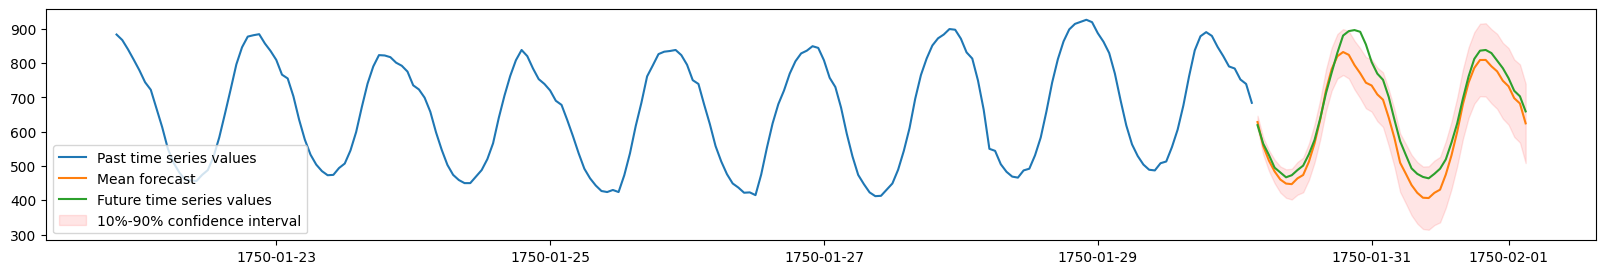

In [7]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "H1"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][-48:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [8]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.859744,-0.923977,17.822211,35.797220,2.994694,6
1,RecursiveTabular,-0.862797,-0.933874,3.850945,4.452366,37.270161,4
2,SeasonalNaive,-1.022854,-1.216909,0.522956,0.443193,0.144394,2
3,DirectTabular,-1.683834,-1.370318,0.655511,0.657629,14.668402,5
4,Theta,-1.905365,-2.142531,12.781426,30.244032,0.104874,3
5,Naive,-6.696079,-6.662942,0.441074,0.405784,0.134832,1
